# CNN分類器クラスの作成
1次元畳み込みニューラルネットワークモデルのクラスScratch1dCNNClassifierを作成してください。Sprint11で作成したScratchDeepNeuralNetrowkClassifierを元にしてください。

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Using TensorFlow backend.


###### データセットの用意・整形

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(-1, 1, 784)
X_test = X_test.reshape(-1, 1, 784)

###### データ数の削減・正規化・分割

In [4]:
X_train = X_train[:300]
y_train = y_train[:300]
X_test = X_test[:100]
y_test = y_test[:100]

In [5]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) 
print(X_val.shape)

(240, 1, 784)
(60, 1, 784)


# 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成
チャンネル数を1に限定した1次元畳み込み層のクラスSimpleConv1dを作成してください。基本構造はsprint11で作成したFCクラスと同じになります。なお、重みの初期化に関するクラスは必要に応じて作り変えてください。Xavierの初期値などを使う点は全結合層と同様です。

ここではパディングは考えず、ストライドも1に固定します。また、複数のデータを同時に処理することも考えなくて良く、バッチサイズは1のみに対応してください。この部分の拡張はアドバンス課題とします。

In [7]:
class SimpleConv1d:

    
    def __init__(self, P=0, S=1):
        self.P = P #パディングは考えない
        self.S = S #ストライドは１として考える

    def _N_out(self,X,W):

        self.N_in = len(X) #入力の次元はXの次元
        self.F = len(W) #フィルターサイズは重みの長さ
        
        N_out = (self.N_in + 2 * self.P - self.F)  / self.S + 1
        return N_out
    
    def forward(self, X, W, B):
        """
        """

        self.forward_X = X.copy()
        self.W = W
        self.B = B
        self.F = len(W)
        
        A = []
        for i in range(0,len(X)-self.F+1):
            A.append(float( \
                           np.sum(X[i:i + self.F] *self.W) \
                                   + self.B))
            self.A = np.array(A)
            
        return np.array(A)
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        
        #dBの算出
        dB = np.array(np.sum(dA))
        #dWの算出
        index = []
        index_all = list(range(0,len(self.forward_X)))
        for i in range(0,int(self._N_out(self.forward_X,self.W))):
            index.append(list(index_all[i:i+self.F]))
        
        dW = np.sum(dA * self.forward_X[np.array(index)].T,axis=1)
        
        #dXの算出
        W_new = np.vstack((np.append(self.W,0),np.append(0,self.W)))
        dX = np.sum(dA * W_new.T,axis=1)
                

        
        return dB,dW,dX

# 【問題2】1次元畳み込み後の出力サイズの計算
畳み込みを行うと特徴量の数が変化します。どのように変化するかは以下の数式から求められます。パディングやストライドも含めています。この計算を行う関数を作成してください。

In [8]:
def N_out(N_in, P, F, S):
    N_out = (N_in + 2 * P - F)  / S + 1
    return N_out

# 【問題3】小さな配列での1次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。

入力x、重みw、バイアスbを次のようにします。

##### フォワードプロパゲーション

In [9]:
import numpy as np
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])

In [10]:
delta_a = np.array([10, 20])
delta_b = np.array([30])
delta_w = np.array([50, 80, 110])
delta_x = np.array([30, 110, 170, 140])

In [11]:
conv1d = SimpleConv1d()

In [12]:
conv1d.forward(x,w,b)

array([35., 50.])

In [13]:
conv1d.backward(delta_a)

(array(30), array([ 50,  80, 110]), array([ 30, 110, 170, 140]))

# 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成
チャンネル数を1に限定しない1次元畳み込み層のクラスConv1dを作成してください。

紙やホワイトボードを使い計算グラフを書きながら考えてください。



###### サンプルデータ

In [14]:
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b = np.array([1, 2, 3]) # （出力チャンネル数）
display(w)

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [15]:
a = np.array([[16, 22], [17, 23], [18, 24]])

###### クラス作成

In [16]:
class Conv1d:
    """
    チャンネル数を指定しない1次元畳み込み層クラス
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    W : 重み
    B : バイアス
    X : 入力
    out_w : 出力のサイズ
    """
    def __init__(self, initializer, optimizer, filter_num, C, filter_size):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(filter_num=filter_num, C=C, filter_size=filter_size)
        self.B = initializer.B(filter_num)
        
        #インスタンス変数
        self.X = None
        self.out_w = None

    
    def forward(self, X):
        """
        フォワードプロバケーション
        Parameters
        ----------
        X : 入力
            
        Returns
        ----------
        A : 出力
        """
        self.X = X
        
        #shapeの取得
        batch, C, W = self.X.shape #(バッチサイズ, 入力チャンネル, 特徴量)
        FN, C, FS = self.W.shape #(出力チャンネル,  入力チャンネル, フィルタサイズ)

        #出力のサイズ(特徴量方向)
        self.out_w = self._n_out(W, 0, FS, 1)

        #出力の形
        A = np.zeros((batch, FN, self.out_w)) #(バッチサイズ, 出力チャンネル数, 特徴量数)

        #バッチ数
        for i in range(batch):
            #出力チャンネル数
            for j in range(FN):
                #入力チャンネル数
                for k in range(C):
                    #特徴量数
                    for l in range(self.out_w):
                        #足しあげる
                        A[i, j, l] += np.sum(self.X[i, k, l: l + FS] * self.W[j, k, :] ) 

        #バイアスを足す
        A += self.B.reshape(1, -1, 1)
        
        return A

    
    def backward(self, dA):
        """
        バックプロバケーション
        Parameters
        ----------
        dA : 後ろから流れてきた勾配
            
        Returns
        ----------
        dX : 前に流す勾配
        """
        FN, C, FS = self.W.shape # (出力チャンネル数、入力チャンネル数、フィルタサイズ)
        batch, C, W = self.X.shape # (バッチサイズ、入力チャンネル数、特徴量数)

        #空の配列
        self.dW = np.zeros(self.W.shape) #Wの勾配
        dX = np.zeros(self.X.shape) #Xの勾配

        #バッチサイズ
        for i in range(batch):
            #出力チャンネル
            for j in range(FN):
                #入力チャンネル
                for k in range(C):
                    #フィルタサイズ
                    for l in range(FS):
                        #出力特徴量
                        for m in range(self.out_w):
                            #足しあげる
                            self.dW[j, k, l] += dA[i, j, m] * self.X[i, k, l + m]
                            dX[i, k, l + m] += dA[i, j, m] * self.W[j, k, l]

        #bの勾配
        self.dB = dA.sum(axis=2)
        
        # 重み、バイアスの更新
        self = self.optimizer.update(self)
        
        return dX

    
    def _n_out(self, n_in, P, F, S):
        '''
        出力サイズの計算
        
        Parameters
        --------------
        n_in : int
            入力のサイズ
        P : int
            パディング数
        F : 
            フィルター(重み)のサイズ
        S : 
            ストライドのサイズ
            
        returns
        ---------
        n_out : int
            出力のサイズ
        '''
        n_out = int(((n_in + 2 * P - F) / S ) + 1)
        
        return n_out

###### 分類機の作成

In [17]:
import numpy as np
import pandas as pd

class Scratch1dCNNClassifier():

    def __init__(self, epoch=5, activation='relu', solver='adagrad', lr=0.01,
                                 batch_size=10, initializer='he', sigma=0.01, n_nodes1=100, 
                                 n_nodes2=50, filter_num=3,  filter_size=7, verbose=True):
        #ハイパーパラメータ 
        self.epoch = epoch              #エポック数
        self.activation = activation     #活性化関数
        self.solver = solver            #最適化の手法
        self.lr = lr             #学習率
        self.batch_size = batch_size   #バッチサイズ
        self.initializer = initializer             #重みの初期化方法
        self.sigma   = sigma            #重みパラメータ
        self.n_nodes1 = n_nodes1    #1層目のノード数
        self.n_nodes2 = n_nodes2    #2層目のノード数
        self.filter_num = filter_num    #フィルタの数
        self.filter_size = filter_size    #フィルタのサイズ
        self.verbose  = verbose        #学習過程の出力(True : 有, False : 無)

        #インスタンス変数
        self.conv1              =None #畳み込み層のインスタンス
        self.FC1                  = None #結合層のインスタンス
        self.FC2                  = None #結合層のインスタンス
        self.activation1     = None #活性化関数のインスタンス
        self.activation2     = None #活性化関数のインスタンス
        self.activation3     = None #活性化関数のインスタンス
        self.loss_list           = None #学習用データの損失を記録する配列
        self.val_loss_list    = None #検証用データの損失を記録する配列
        self.flat                   = None #平滑化インスタンス

    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        #検証データを格納する
        self.X_val = X_val
        self.y_val = y_val
        
        #one_hotエンコーディング
        y_ohe = np.array(pd.get_dummies(y, dummy_na=False))
        
        #ミニバッチを取得するクラスをインスタンス化
        get_mini_batch = GetMiniBatch(X, y_ohe, self.batch_size)
        
        #valがある場合
        if X_val is not None and y_val is not None:       
            y_val_ohe = np.array(pd.get_dummies(y_val, dummy_na=False)) #one-hotエンコーディング
            get_val_mini_batch = GetMiniBatch(X_val, y_val_ohe, self.batch_size) #インスタンス化
        
        
        #活性化関数の設定
        if self.activation == 'sigmoid':
            activation1 = Sigmoid()
            activation2 = Sigmoid()
            activation3 = Sigmoid()
        elif self.activation == 'tanh':
            activation1 = Tanh()
            activation2 = Tanh()
            activation3 = Tanh()
        elif self.activation == 'relu':
            activation1 = ReLU()
            activation2 = ReLU()
            activation3 = ReLU()

        
        #最適化手法の設定
        if self.solver == 'sgd':
            optimizer1 = SGD(self.lr)
            optimizer2 = SGD(self.lr)
            optimizer3 = SGD(self.lr) 
            optimizer4 = SGD(self.lr)
            optimizer5 = SGD(self.lr) 
        elif self.solver == 'adagrad':
            optimizer1 = AdaGrad(self.lr)
            optimizer2 = AdaGrad(self.lr)
            optimizer3 = AdaGrad(self.lr)
            optimizer4 = AdaGrad(self.lr)
            optimizer5 = AdaGrad(self.lr)
            
        #重みの初期化方法の設定
        if self.initializer == 'simple':
            initializer1 = SimpleInitializer(self.sigma)
            initializer2 = SimpleInitializer(self.sigma)
            initializer3 = SimpleInitializer(self.sigma)
            initializer4 = SimpleInitializer(self.sigma)
            initializer5 = SimpleInitializer(self.sigma)
        elif self.initializer == 'xavier':
            initializer1 = XavierInitializer()
            initializer2 = XavierInitializer()
            initializer3 = XavierInitializer()
            initializer4 = XavierInitializer()
            initializer5 = XavierInitializer()
        elif self.initializer == 'he':
            initializer1 = HeInitializer()
            initializer2 = HeInitializer()
            initializer3 = HeInitializer()
            initializer4 = HeInitializer()
            initializer5 = HeInitializer()

        #畳み込み層
        self.conv1 = Conv1d(initializer1, optimizer1, self.filter_num, X.shape[1], self.filter_size)
        self.activation1 = activation1
        
        #平滑化クラスのインスタンス化
        self.flat = Flatten()
        out = self.filter_num * (X.shape[2] - (self.filter_size - 1))

        #結合層および活性化関数クラスのインスタンス化
        self.FC1 = FC(out, self.n_nodes1, initializer2, optimizer2) #第1層
        self.activation2 = activation2
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer3, optimizer3) #第2層
        self.activation3 = activation3
        self.FC3 = FC(self.n_nodes2, y_ohe.shape[1], initializer4, optimizer4) #第3層
        self.activation4 = Softmax()
        
        #損失を記録するリスト(エポックごと)
        self.loss_list = []
        self.val_loss_list= []
        
        #########
        # 学習開始
        #########
        
        for epoch in range(self.epoch): 
            
            #ミニバッチごとの損失を格納
            mini_loss_list = []
            
            for mini_X_train, mini_y_train in get_mini_batch: #バッチ数分学習を実施 
                
                #フォワード
                #畳み込み(1層目)
                A1 = self.conv1.forward(mini_X_train) 
                Z1 = self.activation1.forward(A1)    
                
                #平滑化
                F1 = self.flat.forward(Z1)
                
                #全結合層
                A2 = self.FC1.forward(F1)                   
                Z2 = self.activation2.forward(A2) 
                A3 = self.FC2.forward(Z2)             
                Z3 = self.activation3.forward(A3)
                A4 = self.FC3.forward(Z3)             
                Z4 = self.activation4.forward(A4)   
                
                #バックワード
                #全結合層
                dA4, mini_batch_loss = self.activation4.backward(mini_y_train) 
                dZ4 = self.FC3.backward(dA4)          
                dA3 = self.activation3.backward(dZ4) 
                dZ3 = self.FC2.backward(dA3)            
                dA2 = self.activation2.backward(dZ3) 
                dZ2 = self.FC1.backward(dA2)    
                
                #shapeを戻す
                dF1 = self.flat.backward(dZ2)
                
                #畳み込み層
                dA2 = self.activation1.backward(dF1)
                dZ1 = self.conv1.backward(dA2)

                
                
                #ミニバッチごとのクロスエントロピーを算出しリストに格納
                #mini_batch_loss = self._cross_entropy(mini_y_train, Z3)
                mini_loss_list.append(mini_batch_loss)

                
            
            #エポック毎の学習データの損失平均をリストに格納
            epoch_loss = np.mean(mini_loss_list)
            self.loss_list.append(epoch_loss)


            #valがあるときもイテレーション数実行
            if (X_val is not None) and (y_val is not None):
                
                #ミニバッチごとの損失を格納するリストを作成
                mini_val_loss_list = []
                
                for mini_X_val, mini_y_val in get_val_mini_batch:

                    #損失を計算
                    A1 = self.conv1.forward(mini_X_val)
                    Z1 = self.activation1.forward(A1)
                    F1 = self.flat.forward(Z1)
                    A2 = self.FC1.forward(F1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC2.forward(Z2)
                    Z3 = self.activation3.forward(A3)
                    A4 = self.FC3.forward(Z3) 
                    Z4 = self.activation4.forward(A4)
                    
                    
                    #損失を計算
                    _, mini_val_loss = self.activation4.backward(mini_y_val) 

                    
                    #イテレーションごとの損失をリストに格納
                    mini_val_loss_list.append(mini_val_loss)

                #エポック毎の検証データの損失平均をリストに格納
                val_loss = np.mean(mini_val_loss_list)
                self.val_loss_list.append(val_loss)

                
            #学習過程を出力する場合
            if self.verbose == True:
                print('epoch:' + str(epoch + 1) + '-train_loss:' + str(self.loss_list[epoch]))
                
                #検証用データがある場合
                if (self.X_val is not None) and (self.y_val is not None):
                      print('epoch:' + str(epoch + 1) + '-val_loss:',str(self.val_loss_list[epoch]))
                

                
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        #フォワード
        #畳み込み(1層目)
        A1 = self.conv1.forward(X) 
        Z1 = self.activation1.forward(A1) 
        
        #平滑化
        F1 = self.flat.forward(Z1)
        
        #全結合層
        A2 = self.FC1.forward(F1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC2.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC3.forward(Z3)
        y_proba = self.activation4.forward(A4)  
                       
        return np.argmax(y_proba, axis=1)

    def loss_graph(self):
        #損失関数の遷移
        plt.figure(figsize=(3, 2), dpi=200)
        plt.title('model loss')
        plt.xlabel('epoch')
        plt.ylabel('Closs entropy')
        if (self.X_val is not None) and (self.y_val is not None): #　検証データがある場合
            plt.plot(self.val_loss_list, color='red',label = "val_loss",linewidth=1,linestyle='solid')
        plt.plot(self.loss_list, color='blue',label = "train_loss",linewidth=1,linestyle='solid')
        plt.legend()

###### バッチ作成クラス

In [18]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parametersf
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

###### レイヤー

In [19]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = self.initializer.W(n_nodes1, n_nodes2)
        #self.B = self.initializer.B(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X: 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """      
        self.forward_X = X.copy()
        A = X @ self.W + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        self.dB = dA
        self.dW = self.forward_X.T @ dA 
        dZ = dA @ self.W.T
        
        # 更新
        self = self.optimizer.update(self)
        
        return dZ

##### 初期化クラス

In [20]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma #重みパラメータ
        

    def W(self, n_nodes1=None, n_nodes2=None, 
                  filter_num=None, C=None, filter_size=None):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
            前の層のノード数
        n_nodes2 : int
            後の層のノード数
        filter_num : int
            フィルター数
        C : int
            チャンネル数
        filter_size : int
            フィルターのサイズ(縦横同じ)

        Returns
        ----------
        W : 次の形のndarray, shape (n_nodes1, n_nodes2)
            重み
        """
        #畳み込み
        if filter_num is not None and C is not None and filter_size is not None:
            W =  self.sigma * np.random.randn(filter_num, C, filter_size) 
       
        #全結合
        if n_nodes1 is not None and n_nodes2 is not None:
            W =  self.sigma * np.random.randn(n_nodes1, n_nodes2) 

        return W
    
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
            後の層のノード数

        Returns
        ----------
        B :次の形のndarray, shape (n_nodes2)
            バイアス
        """
        B = np.zeros(n_nodes2)
        
        return B

In [21]:
class XavierInitializer:
    """
    Xavierの初期値のクラス
    """
    def __init__(self):
        pass
        

    def W(self, n_nodes1=None, n_nodes2=None, 
                  filter_num=None, C=None, filter_size=None):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        filter_num : int
            フィルター数
        C : int
            チャンネル数
        filter_size : int
            フィルタサイズ
        Returns
        ----------
        W : 次の形のndarray, shape (n_nodes1, n_nodes2)
            重み
        """
        #畳み込み層
        if filter_num and C and filter_size is not None:
            W =  np.random.randn(filter_num, C, filter_size) / np.sqrt(filter/num) 
        
        #全結合層
        else:
            W = np.random.randn(n_nodes1, n_nodes2) / np.sqrt(n_nodes1) 
    
        return W
    
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B : 次の形のndarray, shape (n_nodes2, )
            バイアス
        """
        B = np.zeros(n_nodes2) 
        
        return B

In [22]:
class HeInitializer:
    """
    Heの初期値のクラス
    """
    def __init__(self):
        pass
        

    def W(self, n_nodes1=None, n_nodes2=None, 
                  filter_num=None, C=None, filter_size=None):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        filter_num : int
            フィルター数
        C : int
            チャンネル数
        filter_size : int
            フィルタサイズ
        Returns
        ----------
        W : 次の形のndarray, shape (n_nodes1, n_nodes2)
            重み
        """
        #畳み込み層
        if filter_num and C and filter_size is not None:
            W = np.random.randn(filter_num, C, filter_size) * np.sqrt(2 / filter_num)
       
        #全結合層
        else:
            W = np.random.randn(n_nodes1, n_nodes2) * np.sqrt(2 / n_nodes1)
    
        return W
    
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
            後の層のノード数

        Returns
        ----------
        B : 次の形のndarray, shape (n_nodes2, )
            バイアス
        """
        B = np.zeros(n_nodes2) 
        
        return B

###### 最適化手法クラス

In [23]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        layer.W -= self.lr * layer.dW / layer.dB.shape[0]
        layer.B -= self.lr * np.mean(layer.dB, axis=0)        
        
        return layer

In [24]:
class AdaGrad:
    """
    AdaGrad
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.HW = None
        self.HB = None
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        
        #初期化
        if self.HW is None:
            self.HW = np.zeros(layer.W.shape)
        if self.HB is None:
            self.HB = np.zeros(layer.B.shape)
        
        #self.HW,self.HBの更新
        self.HW += (layer.dW / layer.dB.shape[0]) ** 2
        self.HB += np.mean(layer.dW) ** 2
        layer.W -= self.lr / np.sqrt(self.HW + 1e-5) * layer.dW / layer.dB.shape[0]
        layer.B -= self.lr / np.sqrt(self.HB + 1e-5) * layer.dB.mean(axis=0)       
        
        return layer

###### 活性化関数クラス

In [25]:
class Sigmoid:
    
    def __init__(self):
        
        self.forward_A = None
        
    def forward(self, A):
        
        self.forward_A = 1 / (1 + np.exp(-A)) 
        
        return self.forward_A 
    
    
    def backward(self, dZ):
        dA = dZ * (1 - self.forward_A ) * self.forward_A
        return dA

In [26]:
class Tanh:
    def __init__(self):
        self.forward_A = None
        
    def forward(self,A):
        self.forward_A = np.tanh(A)
        return self.forward_A
    
    def backward(self,dZ):
        dA = dZ * (1-self.forward_A ** 2)
        return dA

In [27]:
class ReLU:
    def __init__(self):
        self.forward_A = None
        
    def forward(self, A):
        self.forward_A = A.copy()
        return np.maximum(0,A)
    
    def backward(self, A):
        return np.where(self.forward_A > 0, A, 0)

In [28]:
class Softmax:
    def __init__(self):
        self.forward_A = None
    
    def forward(self,a):
        c = np.max(a) #一番大きい値を取得
        exp_a = np.exp(a - c) #各要素から一番大きな値を引く（オーバーフロー対策）
        sum_exp_a = np.sum(exp_a, axis=1) #要素の値　/ 全体の要素の合計
        self.forward_A = exp_a / sum_exp_a.reshape(-1,1)
        return self.forward_A
    
    def backward(self,y): # 正解ラベルと予測値の差を算出
        
        loss_sum = np.sum(y * np.log(self.forward_A), axis=1)
        
        #勾配の計算
        dA = self.forward_A - y
        
        return dA, -np.mean(loss_sum)

###### 平滑化

In [29]:
class Flatten():
    '''
    平滑化
    '''
    def __init__(self):
        self.forward_input_shape = None
        
    
    def forward(self, forward_input):

        #1次元にする
        forward_output = forward_input.reshape(forward_input.shape[0], -1)
        
        #shapeを戻すために記録しておく
        self.forward_input_shape = forward_input.shape
        
        return forward_output
    

    def backward(self, backward_input):

        #shapeを元に戻す
        backward_output = backward_input.reshape(self.forward_input_shape)
        
        return backward_output

# 【問題5】学習・推定
これまで使ってきたニューラルネットワークの全結合層の一部をConv1dに置き換えて学習と推定を行ってください。出力層だけは全結合層をそのまま使ってください。
チャンネルが複数ある状態では全結合層への入力は行えません。その段階でのチャンネルは1になるようにするか、平滑化を行います。平滑化はNumPyのreshapeが使用できます。
numpy.reshape — NumPy v1.15 Manual
画像に対しての1次元畳み込みは実用上は行わないことのため、精度は問いません。

epoch:1-train_loss:1.707568236712813
epoch:1-val_loss: 0.5162854999023857
epoch:2-train_loss:0.3753041412019636
epoch:2-val_loss: 0.33055822359884013
epoch:3-train_loss:0.1499942405421523
epoch:3-val_loss: 0.31813670066052296
epoch:4-train_loss:0.07697023048414955
epoch:4-val_loss: 0.3095170760159929
epoch:5-train_loss:0.04482811184577759
epoch:5-val_loss: 0.30779979707271016


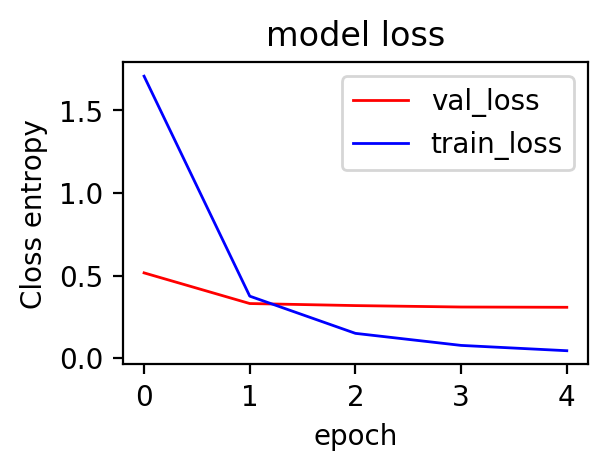

In [30]:
cnn_net = Scratch1dCNNClassifier()
cnn_net.fit(X_train, y_train, X_val, y_val)
cnn_net.loss_graph()

In [32]:
cnn_net.predict(X_test)

array([7, 2, 1, 0, 4, 1, 9, 9, 4, 9, 0, 0, 9, 0, 1, 0, 4, 7, 2, 4, 9, 6,
       4, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 9, 2,
       5, 5, 5, 2, 4, 4, 6, 3, 5, 5, 2, 0, 4, 1, 9, 4, 7, 8, 4, 2, 7, 4,
       2, 4, 3, 0, 7, 0, 2, 8, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 4, 3, 8, 4, 5, 1, 6, 7])

# 【問題6】（アドバンス課題）パディングの実装
畳み込み層にパディングを加えてください。1次元配列の場合、前後にn個特徴量を増やせるようにしてください。

最も単純なパディングは全て0で埋めるゼロパディングであり、CNNでは一般的です。他に端の値を繰り返す方法などもあります。

フレームワークによっては、元の入力のサイズを保つようにという指定をすることができます。この機能も持たせておくと便利です。

なお、NumPyにはパディングの関数が存在します。

# 【問題7】（アドバンス課題）ミニバッチへの対応
ここまでの課題はバッチサイズ1で良いとしてきました。しかし、実際は全結合層同様にミニバッチ学習が行われます。Conv1dクラスを複数のデータが同時に計算できるように変更してください。

# 【問題8】（アドバンス課題）任意のストライド数
ストライドは1限定の実装をしてきましたが、任意のストライド数に対応できるようにしてください。